In [25]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from math import sqrt
from numpy.linalg import eigh,eig
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [26]:
def zscore(m):
    return ((m.T-np.mean(m,axis=1))/np.std(m,axis=1)).T

def cov(matrix):
  return np.dot(matrix.T,matrix)/shape[0] 
    
def pca(matrix,shape): 
    values,vectors=eigh(matrix)
    vectors=np.asarray(vectors).T
    res = {values[i]: vectors[i] for i in range(len(values))}
    od=OrderedDict(sorted(res.items(),reverse=True))
    return od

def svd(matrix):
  mat1 = np.dot(matrix.T,matrix)
  values,vectors=eig(mat1)
  U=np.asarray(vectors).T
  index=np.argsort(values)[::-1]
  U_sorted=[U[i] for i in index]

  vals=[]
  for i in index:
    if(values[i]>0):
      vals.append(sqrt(values[i]))
  sigma = np.zeros((len(vals),len(vals)))
  for i in range(len(sigma)):
    for j in range(len(sigma[0])):
      if(i==j):
        sigma[i,j]=vals[i]

  mat2 = np.dot(matrix,matrix.T)
  values,vectors=eig(mat2)
  V=np.asarray(vectors).T
  index=np.argsort(values)[::-1]
  V_sorted=[V[i] for i in index]

  return U_sorted,V_sorted,sigma

def show_img(vector):
  img_data = vector.reshape((64,64))
  plt.imshow(img_data,cmap='gray')
  plt.show()

def find_alphas(data,base_faces):
  matrix=np.empty((len(data),len(base_faces)))
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      matrix[i,j]=np.dot(data[i].T,base_faces[j])
  return matrix

def reconstruction(alphas,base_faces):
  
  for i in range(len(base_faces)):
    if(i==0):
      temp=base_faces[i]*alphas[i]
    else:
      temp+=base_faces[i]*alphas[i] 
  
  show_img(temp)

In [3]:
olivetti = fetch_olivetti_faces()

data = olivetti.images
shape=data.shape
print(shape)

data=data.reshape(shape[0],shape[1]*shape[2])

data = zscore(data.reshape(shape[0],shape[1]*shape[2]))
matrix=cov(data)

base_faces_dict = pca(matrix,shape)

########## Using Library ###########

pca = PCA(n_components = 16)
temp=pca.fit(matrix)
base_faces_pca=pca.components_
print(pca.explained_variance_ratio_)

(400, 64, 64)
[9.1814286e-01 4.7983754e-02 1.1697339e-02 5.2762846e-03 4.2795632e-03
 2.5022726e-03 1.6833709e-03 1.5534851e-03 9.7549084e-04 7.4393547e-04
 6.9070759e-04 5.3808227e-04 4.3891140e-04 3.8042487e-04 3.3163250e-04
 2.7003966e-04]


(400, 4096)
(400, 16)


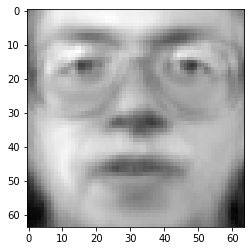

In [4]:
base_faces=[base_faces_dict[i] for i in base_faces_dict]
print(data.shape)
alphas = find_alphas(data,base_faces[:16])
print(alphas.shape)
number = int(input("Enter face number"))
reconstruction(alphas[number],base_faces[:16])

(400, 64, 64)
(64, 64)


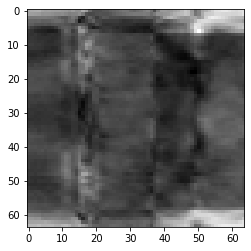

In [31]:
olivetti = fetch_olivetti_faces()

data = olivetti.images
shape=data.shape
print(shape)

data = zscore(data.reshape(shape[0],shape[1]*shape[2]))
data=data.reshape(shape)

for i in data[:1]:
    matrix = np.zeros(shape[1:])    
    U,V,sigma = svd(i)
    U = np.asarray(U)
    V=np.asarray(V)
    print(sigma.shape)
    for j in range(len(sigma)):
        temp=U[j]*sigma[j,j]
        matrix+=np.dot(temp.reshape(-1,1),V[j].reshape(1,-1))
        
    show_img(matrix)